# Data Cleaning and Preprocessing

**Project:** Trust, Ethical Concerns, and Usage Patterns of ChatGPT  
**Team:** Team 5  
**Date:** November 2025

This notebook loads the raw dataset, performs cleaning, creates composite scores, and saves cleaned data.

## 1. Setup and Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 2. Load Raw Data

In [30]:
# Load dataset
df = pd.read_excel('../../data/raw.xlsx')

print(f"Dataset shape: {df.shape}")
print(f"Rows: {len(df):,}")
print(f"Columns: {len(df.columns)}")

Dataset shape: (22963, 180)
Rows: 22,963
Columns: 180


In [31]:
# Display first few rows
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13a,Q13b,Q13c,Q13d,Q13e,Q13f,Q13f_text,Q14,Q15,Q16,Q17,Q18a,Q18b,Q18c,Q18d,Q18e,Q18f,Q18g,Q18h,Q18i,Q18j,Q18k,Q18l,Q19a,Q19b,Q19c,Q19d,Q19e,Q19f,Q19g,Q19h,Q19i,Q19j,Q20,Q21a,Q21b,Q21c,Q21d,Q22a,Q22b,Q22c,Q22d,Q22e,Q22f,Q22g,Q22h,Q22i,Q22j,Q23a,Q23b,Q23c,Q23d,Q24a,Q24b,Q24c,Q24d,Q24e,Q24f,Q24g,Q25a,Q25b,Q25c,Q25d,Q26a,Q26b,Q26c,Q26d,Q26e,Q26f,Q26g,Q26h,Q26i,Q26j,Q27a,Q27b,Q27c,Q27d,Q27e,Q27f,Q27g,Q27h,Q27i,Q27j,Q28a,Q28b,Q28c,Q28d,Q28e,Q28f,Q28g,Q28h,Q28i,Q29a,Q29b,Q29c,Q29d,Q29e,Q29f,Q29g,Q29h,Q29i,Q30a,Q30b,Q30c,Q30d,Q30e,Q30f,Q30g,Q30h,Q30i,Q30j,Q30k,Q30l,Q31a,Q31b,Q31c,Q31d,Q32a,Q32b,Q32c,Q32d,Q32e,Q32f,Q32g,Q32h,Q32i,Q32j,Q32k,Q32l,Q32m,Q32n,Q32o,Q33,Q34,Q35a,Q35b,Q35c,Q35d,Q35e,Q35f,Q35g,Q35h,Q35i,Q35j,Q35k,Q35l,Q35m,Q35n,Q36,Q37,Q38,Q39,Q40a,Q40b,Q40c,Q40d,Q40e,Q40f,Q40g,Q40h,Q40i,Q40j,Q40k,Q40l,Q40m,Q40n,Q40o,source
0,Afghanistan,2.0,19,Afghanistan,f\'h\'h,2.0,1.0,2.0,2.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR
1,Afghanistan,3.0,100,Afghanistan,No,1.0,1.0,3.0,1.0,3.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EN
2,Afghanistan,1.0,19,Angola,Alastqlql,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR
3,Afghanistan,4.0,95,Antigua & Barbuda,Facultad de gastronomía,1.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,4.0,5.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,ES
4,Afghanistan,3.0,22,Czech Republic,Economics and management CZU,1.0,1.0,2.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,3.0,3.0,4.0,4.0,3.0,2.0,1.0,

In [32]:
# Display column names
print("All columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:3d}. {col}")

All columns:
  1. Q1
  2. Q2
  3. Q3
  4. Q4
  5. Q5
  6. Q6
  7. Q7
  8. Q8
  9. Q9
 10. Q10
 11. Q11
 12. Q12
 13. Q13a
 14. Q13b
 15. Q13c
 16. Q13d
 17. Q13e
 18. Q13f
 19. Q13f_text
 20. Q14
 21. Q15
 22. Q16
 23. Q17
 24. Q18a
 25. Q18b
 26. Q18c
 27. Q18d
 28. Q18e
 29. Q18f
 30. Q18g
 31. Q18h
 32. Q18i
 33. Q18j
 34. Q18k
 35. Q18l
 36. Q19a
 37. Q19b
 38. Q19c
 39. Q19d
 40. Q19e
 41. Q19f
 42. Q19g
 43. Q19h
 44. Q19i
 45. Q19j
 46. Q20
 47. Q21a
 48. Q21b
 49. Q21c
 50. Q21d
 51. Q22a
 52. Q22b
 53. Q22c
 54. Q22d
 55. Q22e
 56. Q22f
 57. Q22g
 58. Q22h
 59. Q22i
 60. Q22j
 61. Q23a
 62. Q23b
 63. Q23c
 64. Q23d
 65. Q24a
 66. Q24b
 67. Q24c
 68. Q24d
 69. Q24e
 70. Q24f
 71. Q24g
 72. Q25a
 73. Q25b
 74. Q25c
 75. Q25d
 76. Q26a
 77. Q26b
 78. Q26c
 79. Q26d
 80. Q26e
 81. Q26f
 82. Q26g
 83. Q26h
 84. Q26i
 85. Q26j
 86. Q27a
 87. Q27b
 88. Q27c
 89. Q27d
 90. Q27e
 91. Q27f
 92. Q27g
 93. Q27h
 94. Q27i
 95. Q27j
 96. Q28a
 97. Q28b
 98. Q28c
 99. Q28d
100. Q28e
101. Q28

## 3. Data Quality Checks

In [33]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicates")
    print(f"New shape: {df.shape}")

Duplicate rows: 127
✅ Removed 127 duplicates
New shape: (22836, 180)


In [34]:
# Check missing data
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percent': missing_pct
}).sort_values('Percent', ascending=False)

print("Top 20 columns with missing data:")
print(missing_df.head(20))

Top 20 columns with missing data:
           Missing    Percent
Q13f_text    21604  94.605010
Q32m          7115  31.156945
Q32g          7113  31.148187
Q32n          7112  31.143808
Q32j          7112  31.143808
Q32l          7108  31.126292
Q32h          7108  31.126292
Q32k          7107  31.121913
Q32e          7106  31.117534
Q32i          7104  31.108776
Q32c          7103  31.104397
Q32o          7103  31.104397
Q32f          7101  31.095638
Q32b          7097  31.078122
Q32d          7097  31.078122
Q32a          7062  30.924855
Q31b          7054  30.889823
Q31d          7042  30.837274
Q31c          7037  30.815379
Q30k          7037  30.815379


## 4. Create Composite Scores

### 4.1 Perceived Capabilities (Q22a-j)

In [35]:
# Define capability items
capability_cols = [f'Q22{x}' for x in ['a','b','c','d','e','f','g','h','i','j']]
existing_caps = [col for col in capability_cols if col in df.columns]

print(f"Capability columns found: {len(existing_caps)}/10")
print(existing_caps)

# Create composite score
if existing_caps:
    df['capabilities_score'] = df[existing_caps].mean(axis=1)
    
    print(f"\n✅ Capabilities score created")
    print(f"Mean: {df['capabilities_score'].mean():.2f}")
    print(f"SD: {df['capabilities_score'].std():.2f}")
    print(f"Range: [{df['capabilities_score'].min():.2f}, {df['capabilities_score'].max():.2f}]")

Capability columns found: 10/10
['Q22a', 'Q22b', 'Q22c', 'Q22d', 'Q22e', 'Q22f', 'Q22g', 'Q22h', 'Q22i', 'Q22j']

✅ Capabilities score created
Mean: 2.98
SD: 0.86
Range: [1.00, 5.00]


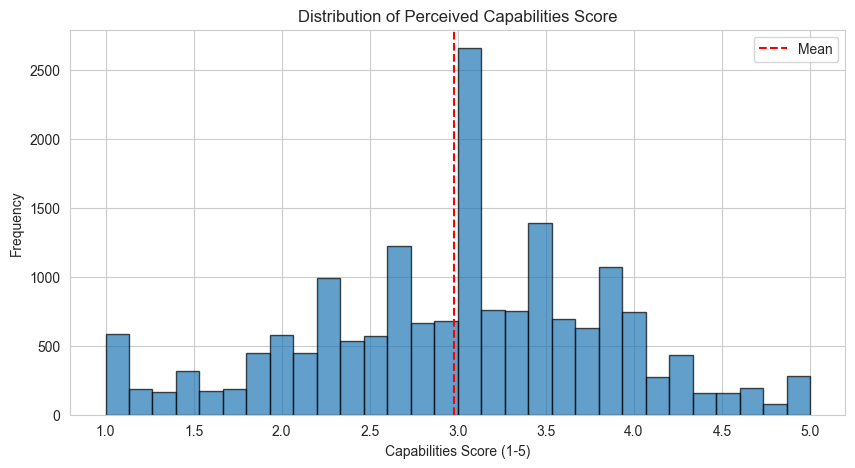

In [36]:
# Visualize distribution
plt.figure(figsize=(10, 5))
plt.hist(df['capabilities_score'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Capabilities Score (1-5)')
plt.ylabel('Frequency')
plt.title('Distribution of Perceived Capabilities Score')
plt.axvline(df['capabilities_score'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

### 4.2 Ethical Concerns (Q28a-i)

In [37]:
# Define ethics items
ethics_cols = [f'Q28{x}' for x in ['a','b','c','d','e','f','g','h','i']]
existing_ethics = [col for col in ethics_cols if col in df.columns]

print(f"Ethics columns found: {len(existing_ethics)}/9")
print(existing_ethics)

# Create composite score
if existing_ethics:
    df['ethics_concerns_score'] = df[existing_ethics].mean(axis=1)
    
    print(f"\n✅ Ethical concerns score created")
    print(f"Mean: {df['ethics_concerns_score'].mean():.2f}")
    print(f"SD: {df['ethics_concerns_score'].std():.2f}")
    print(f"Range: [{df['ethics_concerns_score'].min():.2f}, {df['ethics_concerns_score'].max():.2f}]")

Ethics columns found: 9/9
['Q28a', 'Q28b', 'Q28c', 'Q28d', 'Q28e', 'Q28f', 'Q28g', 'Q28h', 'Q28i']

✅ Ethical concerns score created
Mean: 3.34
SD: 0.74
Range: [1.00, 5.00]


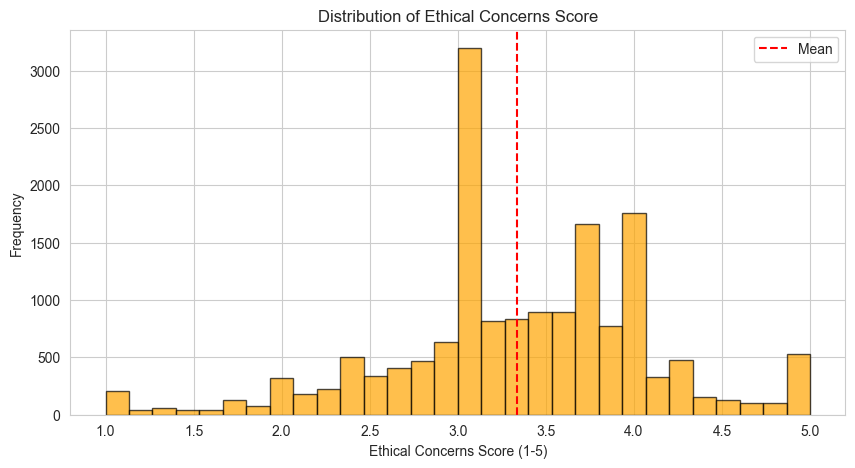

In [38]:
# Visualize distribution
plt.figure(figsize=(10, 5))
plt.hist(df['ethics_concerns_score'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Ethical Concerns Score (1-5)')
plt.ylabel('Frequency')
plt.title('Distribution of Ethical Concerns Score')
plt.axvline(df['ethics_concerns_score'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

### 4.3 Attitudes (Q21a-d)

In [39]:
# Define attitude items
attitude_cols = [f'Q21{x}' for x in ['a','b','c','d']]
existing_attitudes = [col for col in attitude_cols if col in df.columns]

print(f"Attitude columns found: {len(existing_attitudes)}/4")
print(existing_attitudes)

# Create composite score
if existing_attitudes:
    df['attitudes_score'] = df[existing_attitudes].mean(axis=1)
    
    print(f"\n✅ Attitudes score created")
    print(f"Mean: {df['attitudes_score'].mean():.2f}")
    print(f"SD: {df['attitudes_score'].std():.2f}")
    print(f"Range: [{df['attitudes_score'].min():.2f}, {df['attitudes_score'].max():.2f}]")

Attitude columns found: 4/4
['Q21a', 'Q21b', 'Q21c', 'Q21d']

✅ Attitudes score created
Mean: 3.35
SD: 0.85
Range: [1.00, 5.00]


## 5. Create Usage Labels

Usage Frequency Distribution:
usage_label
Daily      17570
Weekly      4058
Monthly      757
Name: count, dtype: int64


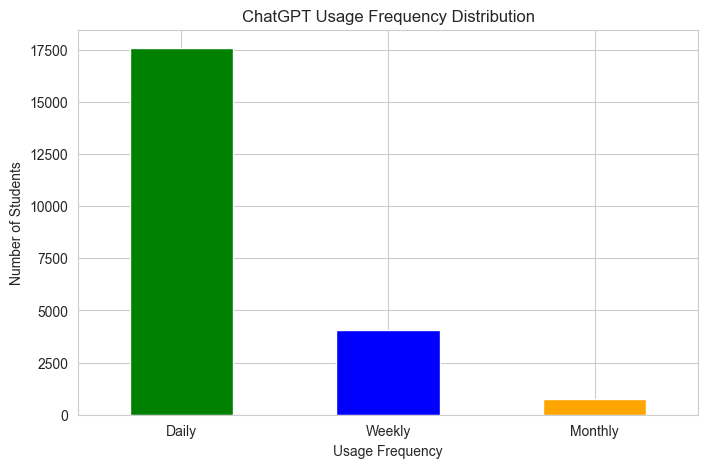

In [40]:
# Map usage frequency
if 'Q8' in df.columns:
    usage_map = {1.0: 'Daily', 2.0: 'Weekly', 3.0: 'Monthly'}
    df['usage_label'] = df['Q8'].map(usage_map)
    
    print("Usage Frequency Distribution:")
    print(df['usage_label'].value_counts())
    
    # Visualize
    plt.figure(figsize=(8, 5))
    df['usage_label'].value_counts().plot(kind='bar', color=['green', 'blue', 'orange'])
    plt.xlabel('Usage Frequency')
    plt.ylabel('Number of Students')
    plt.title('ChatGPT Usage Frequency Distribution')
    plt.xticks(rotation=0)
    plt.show()

## 6. Verify Key Variables

In [41]:
# Check key variables
key_vars = {
    'Trust (Q15)': 'Q15',
    'Recommendation (Q16)': 'Q16',
    'Usage (Q8)': 'Q8',
    'Capabilities': 'capabilities_score',
    'Ethics Concerns': 'ethics_concerns_score',
    'Attitudes': 'attitudes_score'
}

print("Key Variables Summary:")
print("="*60)

for name, var in key_vars.items():
    if var in df.columns:
        missing = df[var].isna().sum()
        missing_pct = (missing / len(df)) * 100
        print(f"{name:20s} - Missing: {missing:5d} ({missing_pct:5.1f}%)")
    else:
        print(f"{name:20s} - ❌ NOT FOUND")

Key Variables Summary:
Trust (Q15)          - Missing:  3249 ( 14.2%)
Recommendation (Q16) - Missing:  3242 ( 14.2%)
Usage (Q8)           - Missing:   451 (  2.0%)
Capabilities         - Missing:  4804 ( 21.0%)
Ethics Concerns      - Missing:  6523 ( 28.6%)
Attitudes            - Missing:  4803 ( 21.0%)


## 7. Reliability Analysis (Cronbach's Alpha)

In [42]:
try:
    import pingouin as pg
    
    print("Cronbach's Alpha (Reliability):")
    print("="*60)
    
    # Capabilities
    if existing_caps:
        alpha_cap = pg.cronbach_alpha(data=df[existing_caps].dropna())
        print(f"Capabilities Scale: α = {alpha_cap[0]:.3f} {'✅' if alpha_cap[0] > 0.70 else '⚠️'}")
    
    # Ethics
    if existing_ethics:
        alpha_eth = pg.cronbach_alpha(data=df[existing_ethics].dropna())
        print(f"Ethics Scale:       α = {alpha_eth[0]:.3f} {'✅' if alpha_eth[0] > 0.70 else '⚠️'}")
    
    # Attitudes
    if existing_attitudes:
        alpha_att = pg.cronbach_alpha(data=df[existing_attitudes].dropna())
        print(f"Attitudes Scale:    α = {alpha_att[0]:.3f} {'✅' if alpha_att[0] > 0.70 else '⚠️'}")
    
    print("\nNote: α > 0.70 indicates acceptable reliability")
    
except ImportError:
    print("⚠️ pingouin not installed. Run: pip install pingouin")
    print("   Skipping reliability analysis for now.")

Cronbach's Alpha (Reliability):
Capabilities Scale: α = 0.909 ✅
Ethics Scale:       α = 0.910 ✅
Attitudes Scale:    α = 0.843 ✅

Note: α > 0.70 indicates acceptable reliability


## 8. Save Cleaned Data

In [44]:
# Save cleaned dataset
output_path = '../../data/cleaned/cleaned_data.csv'

df.to_csv(output_path, index=False)

print(f"✅ Cleaned data saved to: {output_path}")
print(f"   Shape: {df.shape}")
print(f"   Size: {Path(output_path).stat().st_size / 1024 / 1024:.1f} MB")

✅ Cleaned data saved to: ../../data/cleaned/cleaned_data.csv
   Shape: (22836, 184)
   Size: 14.5 MB


## 9. Summary

In [45]:
print("="*80)
print("DATA CLEANING SUMMARY")
print("="*80)
print(f"""
Final Dataset:
- Rows: {len(df):,}
- Columns: {len(df.columns)}

Composite Scores Created:
- Capabilities (Q22a-j): {'✅' if 'capabilities_score' in df.columns else '❌'}
- Ethical Concerns (Q28a-i): {'✅' if 'ethics_concerns_score' in df.columns else '❌'}
- Attitudes (Q21a-d): {'✅' if 'attitudes_score' in df.columns else '❌'}

Key Variables:
- Trust (Q15): {'✅' if 'Q15' in df.columns else '❌'}
- Usage (Q8): {'✅' if 'Q8' in df.columns else '❌'}
- Recommendation (Q16): {'✅' if 'Q16' in df.columns else '❌'}

✅ Data cleaning complete!
""")

DATA CLEANING SUMMARY

Final Dataset:
- Rows: 22,836
- Columns: 184

Composite Scores Created:
- Capabilities (Q22a-j): ✅
- Ethical Concerns (Q28a-i): ✅
- Attitudes (Q21a-d): ✅

Key Variables:
- Trust (Q15): ✅
- Usage (Q8): ✅
- Recommendation (Q16): ✅

✅ Data cleaning complete!



## Next Steps

1. Run **02_descriptive_statistics.ipynb** for summary stats
2. Run **03_correlation_analysis.ipynb** for RQ3
3. Run **04_regression_analysis.ipynb** for RQ1